qp3RDpnqxTiuSw


	ATKKbyb-oZVXz6KMuBb-agBAbf0

In [1]:
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='qp3RDpnqxTiuSw',
                     client_secret='ATKKbyb-oZVXz6KMuBb-agBAbf0',
                     user_agent='Zuhrah')

In [3]:
headlines = set()

In [4]:
for submission in reddit.subreddit('India').new(limit=None):
    headlines.add(submission.title)
#     display.clear_output()
print(len(headlines))

852


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'What is the use of reservation?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Coronavirus: Locals pelt stones on health department team in Indore.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "Lockdown step: 'Home delivery' of FIR in UP's Muzaffarnagar | India News - Times of "
              'India',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [6]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.0,0.0000,What is the use of reservation?
1,0.000,1.000,0.0,0.0000,Coronavirus: Locals pelt stones on health depa...
2,0.000,1.000,0.0,0.0000,Lockdown step: 'Home delivery' of FIR in UP's ...
3,0.434,0.566,0.0,-0.6808,15-yr-old girl raped in UP's Muzaffarnagar dis...
4,0.205,0.795,0.0,-0.4767,"Bengaluru locals attack, snatch phones of Asha..."


In [7]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.0,0.0000,What is the use of reservation?,0
1,0.000,1.000,0.0,0.0000,Coronavirus: Locals pelt stones on health depa...,0
2,0.000,1.000,0.0,0.0000,Lockdown step: 'Home delivery' of FIR in UP's ...,0
3,0.434,0.566,0.0,-0.6808,15-yr-old girl raped in UP's Muzaffarnagar dis...,-1
4,0.205,0.795,0.0,-0.4767,"Bengaluru locals attack, snatch phones of Asha...",-1


In [8]:
df2 = df[['headline', 'label']]

In [9]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [10]:
df.label.value_counts()

 0    468
-1    203
 1    181
Name: label, dtype: int64

In [11]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["Okay, I don't know how many of you have watched the episode 17 of Shut Up Ya Kunal: Tejasvi Surya. But if anyone of you are pro-BJP, I'd really like to hear your opinions on this video. I'm "
 'neutral, I just want to hear from both sides.',
 'Centre credits Rs 500 each to over 4.07 crore women Jan Dhan account holders',
 'Delhi: Police personnel sanitize Nizamuddin Markaz area which emerged as a #coronavirus hotspot post Tablighi Jamaat event last month. 29 of those who attended this event have tested positive till '
 'now in the national capital as per Delhi Health minister, Satyendar Jain.',
 'Amid COVID-19 Lockdown, 2 Telangana Ministers Celebrate Ram Navmi',
 "The Finance Ministry approves Rs 375 Crores for 'Mahakumbh' in Uttarakhand's Haridwar in 2021."]

Negative headlines:

["15-yr-old girl raped in UP's Muzaffarnagar district",
 'Bengaluru locals attack, snatch phones of Asha workers checking houses for coronavirus symptoms',
 'Work-from-home going to st

In [12]:
df.label.value_counts(normalize=True) * 100

 0    54.929577
-1    23.826291
 1    21.244131
Name: label, dtype: float64

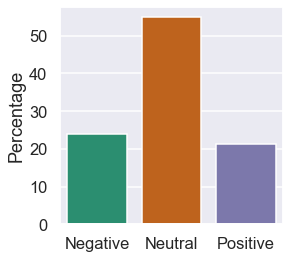

In [13]:

fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [14]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [16]:

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [17]:

def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [18]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('india', 33),
 ('coronavirus', 22),
 ('covid', 22),
 ('19', 20),
 ('lockdown', 18),
 ('pm', 18),
 ('positive', 16),
 ('cases', 16),
 ('help', 14),
 ('health', 13),
 ('like', 12),
 ('modi', 10),
 ('people', 9),
 ('9', 9),
 ('minister', 8),
 ('indian', 8),
 ('delhi', 7),
 ('state', 7),
 ('fund', 7),
 ('cares', 7)]

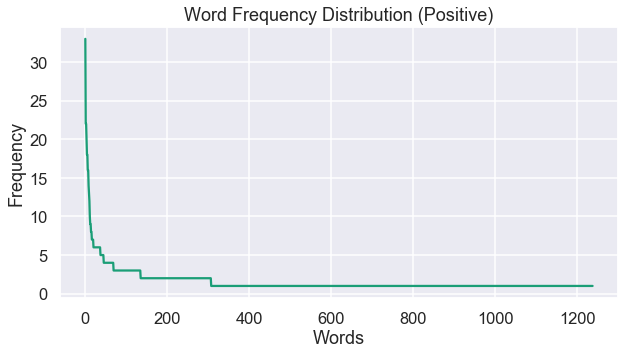

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

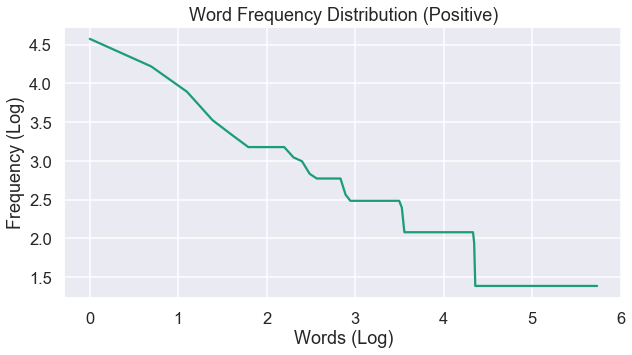

In [20]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('coronavirus', 39),
 ('covid', 38),
 ('19', 38),
 ('india', 36),
 ('lockdown', 26),
 ('workers', 15),
 ('police', 12),
 ('modi', 11),
 ('fight', 11),
 ('news', 10),
 ('indian', 10),
 ('april', 9),
 ('people', 9),
 ('delhi', 9),
 ('home', 8),
 ('pm', 8),
 ('due', 8),
 ('says', 8),
 ('fake', 7),
 ('virus', 7)]

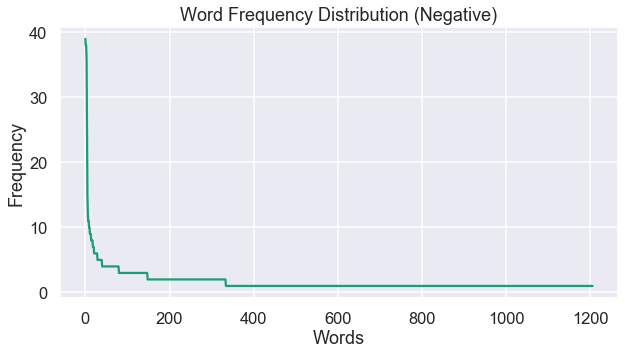

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

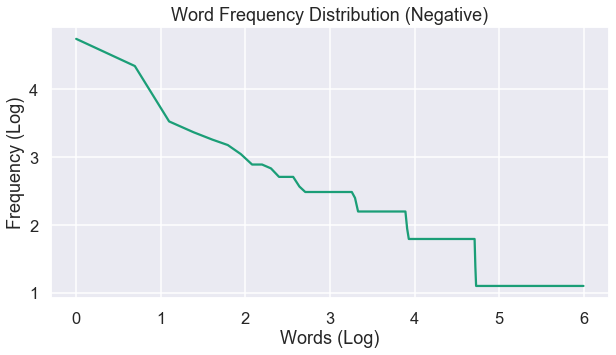

In [23]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()